# **preprosessing data**
## **Menggunakan K-Nearest Neighbors (KNN) dalam Analisis Data**  
### 1. Apa Itu Deteksi Outlier?
Outlier adalah titik data yang secara signifikan berbeda dari sebagian besar data dalam dataset. Penyebab utama outlier bisa berasal dari kesalahan pengukuran, kesalahan input data, atau karakteristik unik dari data itu sendiri. Kehadiran outlier dapat menyebabkan distorsi dalam analisis data dan menurunkan performa model machine learning. Oleh karena itu, deteksi outlier menjadi langkah penting untuk mengidentifikasi dan menangani data yang menyimpang dari pola utama.

### 2. Kenapa KNN Cocok untuk Deteksi Outlier?
K-Nearest Neighbors (KNN) merupakan metode berbasis jarak yang dapat digunakan untuk mengenali pola dalam data, termasuk mendeteksi outlier. Prinsip utama dalam deteksi outlier dengan KNN adalah sebagai berikut:

Jika suatu titik data memiliki jumlah tetangga yang sangat sedikit dalam radius tertentu, maka titik tersebut kemungkinan besar merupakan outlier.
Jika jarak rata-rata ke K tetangga terdekat cukup besar dibandingkan dengan titik lainnya, maka titik tersebut dapat dianggap sebagai outlier.
### 3. Proses Deteksi Outlier dengan KNN
a. Menghitung Jarak Antar Titik Data
Untuk mengukur kedekatan antara satu titik dengan titik lainnya, berbagai metrik jarak dapat digunakan, seperti:
Euclidean Distance (jarak lurus antara dua titik dalam ruang multidimensi).
Manhattan Distance (jarak berbasis grid yang dijumlahkan berdasarkan perbedaan koordinat).
Minkowski Distance (generalized metric yang menggabungkan Euclidean dan Manhattan).

b. Menentukan Nilai K (Jumlah Tetangga Terdekat)
Pemilihan nilai K sangat menentukan hasil deteksi outlier:

K kecil → model menjadi terlalu sensitif terhadap noise dan variasi kecil dalam data.
K besar → bisa menyebabkan outlier tidak terdeteksi karena dipengaruhi oleh banyak tetangga.

c. Menilai Kepadatan Data untuk Identifikasi Outlier
Ada beberapa metode yang digunakan dalam KNN untuk menentukan apakah suatu titik merupakan outlier atau bukan:
K-Nearest Neighbor Distance
Mengukur jarak rata-rata ke K tetangga terdekat. Jika nilai ini jauh lebih besar dibandingkan dengan titik lainnya, maka titik tersebut bisa dikategorikan sebagai outlier.
Local Outlier Factor (LOF)
LOF mengevaluasi kepadatan lokal suatu titik dengan membandingkannya terhadap tetangganya. Jika suatu titik memiliki kepadatan yang jauh lebih rendah dibandingkan dengan tetangga terdekatnya, maka titik tersebut bisa diklasifikasikan sebagai outlier.
Distance-Based Outlier Score
Jika jumlah tetangga dalam radius tertentu sangat sedikit, maka besar kemungkinan titik tersebut adalah outlier.

 

In [1]:
%pip install pymysql
%pip install psycopg2


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### 6 implementasi kode untuk mendeteksi outlier 
#### Code ini bertujuan untuk mendeteksi outlier dalam dataset Iris menggunakan jarak Euclidean antara titik data dan titik referensi terakhir

In [3]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_sc56Zt79uy033vzjIS4",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-16cb25be-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_MfLHp-bDUZ-2mkcA1a6",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Ambil referensi dari baris terakhir (baris ke-152 jika dihitung dari 1, atau index -1)
reference_point = data_values[-1]

def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dari setiap baris ke referensi
df_merged["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier berdasarkan persentil ke-95 (bisa disesuaikan)
threshold = np.percentile(df_merged["distance"], 93.5)
df_merged["outlier"] = df_merged["distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.show()


OperationalError: could not translate host name "pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com" to address: Name or service not known


#### Fungsi code ini menghitung jumlah total outlier dalam dataset setelah dilakukan deteksi outlier menggunakan jarak Euclidean

In [2]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")


Total Outlier: 10


#### Kode ini berfungsi untuk mengurutkan data berdasarkan jarak Euclidean dari yang terkecil hingga terbesar dan menampilkannya dalam bentuk tabel.

In [3]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  distance  outlier
150  Iris-virginica           1.0          8.0           5.9          3.0  0.000000    False
 22     Iris-setosa           1.0          4.0           5.1          3.7  4.138840    False
 16     Iris-setosa           5.0          4.0           5.7          4.4  5.830952    False
 18     Iris-setosa           4.0          3.0           5.1          3.5  5.906776    False
115  Iris-virginica           5.1          2.4           5.8          2.8  6.944062    False
142  Iris-virginica           5.1          2.3           6.9          3.1  7.092954    False
146  Iris-virginica           5.2          2.3           6.7          3.0  7.125307    False
116  Iris-virginica           5.3          2.3           6.4          3.2  7.160307    False
122  Iris-virginica           4.9          2.0           5.6          2.8  7.165194    False
 65 Iris-versicolor           3.6          1.3           5.6          

## apa itu LOF?

 Local Outlier Factor (LOF) adalah algoritma yang digunakan untuk mendeteksi outlier (pencilan), yaitu data yang memiliki perilaku atau karakteristik berbeda dari sebagian besar data lain dalam suatu dataset.

### Bagaimana tahapannya LOF?

Tahapan dalam Local Outlier Factor (LOF)

1.Menentukan Jumlah Tetangga (k-nearest neighbors, k-NN)

-Pilih jumlah tetangga (k) yang akan digunakan untuk membandingkan kepadatan * lokal suatu titik data.

-Semakin besar k, semakin banyak titik yang dibandingkan, sehingga hasilnya lebih stabil tetapi bisa mengaburkan outlier kecil.


### Bagaimana cara menghitung manual LOF

1.Menentukan Tetangga Terdekat (k-NN)
Kita menentukan berapa banyak tetangga (k) yang akan digunakan untuk membandingkan titik yang sedang diperiksa. Semakin banyak tetangga yang digunakan, semakin akurat hasilnya.

2.Mengukur Seberapa Jauh Titik D dari Tetangganya
Setelah menemukan tetangga terdekat, kita mengukur jarak antara D dan masing-masing tetangganya. Jarak ini membantu menentukan apakah D jauh dari kelompoknya atau berada di daerah yang padat.

3.Membandingkan Kepadatan Titik D dengan Tetangganya

-Jika titik D berada di area yang kepadatannya mirip dengan tetangganya, maka D
tidak dianggap outlier.

-Jika titik D berada di daerah dengan kepadatan lebih rendah dibanding tetangganya (artinya D lebih sendirian dibanding yang lain), maka D mungkin outlier.

4.Menghitung Skor LOF
Kita membandingkan kepadatan titik D dengan kepadatan titik-titik lain. Jika kepadatan D jauh lebih kecil dibanding tetangganya, maka nilai LOF tinggi, yang berarti D lebih mencurigakan sebagai outlier.

-Jika nilai LOF mendekati 1 → D bukan outlier.

-Jika nilai LOF lebih besar dari 1 → D mungkin outlier.

-Jika nilai LOF jauh lebih besar dari 1 (misalnya lebih dari 2 atau 3) → D sangat mungkin outlier.




### CONTOH MENGHITUNG MANUAL LOF menggunakan data 10 baris 2 kolom
Berikut adalah cara singkat menghitung **Local Outlier Factor (LOF)** untuk satu titik data dengan dua fitur:

1. **Dataset**:  
   Misalkan data berikut:

| ID | Feature1 | Feature2 |
|----|----------|----------|
| 1  | 2.0      | 3.0      |
| 2  | 3.0      | 4.0      |
| 3  | 4.0      | 5.0      |
| 4  | 5.0      | 6.0      |
| 5  | 6.0      | 7.0      |
| 6  | 7.0      | 8.0      |
| 7  | 8.0      | 9.0      |
| 8  | 9.0      | 10.0     |
| 9  | 10.0     | 11.0     |
| 10 | 40.0     | 40.0     |

   Kita akan menghitung LOF untuk titik ke-10 (40.0, 40.0).

2. **Hitung Jarak Euclidean**:  
   Jarak antara titik 10 dan titik lainnya:

| Dari -> ke | Jarak Ecludian |
|------------|----------------|
| 10 -> 1    | 52.33          |
| 10 -> 2    | 50.91          |
| 10 -> 3    | 49.50          |
| 10 -> 4    | 48.08          |
| 10 -> 5    | 46.67          |
| 10 -> 6    | 45.25          |
| 10 -> 7    | 43.84          |
| 10 -> 8    | 42.42          |
| 10 -> 9    | 41.01          |

3. **Tentukan k-Tetangga Terdekat** (k=2):  
   Dua tetangga terdekat titik 10 adalah titik 9 dan 8.

4. **Hitung Reachability Distance**:  
    Karena k = 2, kita ambil 2 tetangga terdekat, yaitu titik 8 dan 9.
    Karena titik 10 jauh dari kelompok lainnya, maka reachability distance tinggi:

| Dari -> ke | Jarak Ecludian |
|------------|----------------|
| 10 -> 8    | 42.42          |
| 10 -> 9    | 41.01          |


5. **Hitung Local Reachability Density (LRD)**:  
   $
   \text{LRD}(10) = \frac{1}{\frac{1}{2} \times (42.42 + 41.01)} = 0.0239
   $

   $\text{LRD}(8) = 0.095$
   $\text{LRD}(9) = 0.09$

6. **Hitung LOF**:  
   $
   \text{LOF}(3) = \frac{\frac{0.09}{0.0239} + \frac{0.095}{0.0239}}{2} = 3.87
   $

7. **Interpretasi**:  
  Karena LOF(10) = 3.87, titik ke-10 sangat mungkin outlier.

LOF mengukur seberapa terisolasi titik dibandingkan tetangganya. Titik dengan LOF lebih besar dari 1 dianggap outlier.

### impelementasi skylearn menggunakan contoh data 10 baris 2 kolom

In [4]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Dataset contoh (10 baris, 2 fitur)
data = {
    'Feature1': [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 40.0, 16.0 , 15.0, 16.0, 27.0 , 18.0],
    'Feature2': [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 40.0, 24.0 , 16., 28.0 , 63.0, 16.0]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Inisialisasi model LOF dengan k=2 (2 tetangga terdekat)
lof = LocalOutlierFactor(n_neighbors=2)

# Fit model LOF dan prediksi label (1 untuk normal, -1 untuk outlier)
lof_labels = lof.fit_predict(df)

# Menambahkan hasil prediksi ke DataFrame
df['LOF Label'] = lof_labels

# Menampilkan hasil
print(df)

# Menampilkan jumlah outlier
num_outliers = (lof_labels == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")

# Menampilkan data outlier
outliers = df[df['LOF Label'] == -1]
print("\nData Outlier:")
print(outliers)


    Feature1  Feature2  LOF Label
0        2.0       3.0          1
1        3.0       4.0          1
2        4.0       5.0          1
3        5.0       6.0          1
4        6.0       7.0          1
5        7.0       8.0          1
6        8.0       9.0          1
7        9.0      10.0          1
8       10.0      11.0          1
9       40.0      40.0         -1
10      16.0      24.0          1
11      15.0      16.0         -1
12      16.0      28.0          1
13      27.0      63.0         -1
14      18.0      16.0          1

Jumlah outlier: 3

Data Outlier:
    Feature1  Feature2  LOF Label
9       40.0      40.0         -1
11      15.0      16.0         -1
13      27.0      63.0         -1


In [5]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_sc56Zt79uy033vzjIS4",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-16cb25be-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_MfLHp-bDUZ-2mkcA1a6",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

berfungsi untuk mendeteksi outlier (data pencilan) dalam dataset dengan menggunakan algoritma Local Outlier Factor (LOF) dari scikit-learn.

In [6]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")

outliers = df_merge[df_merge["outlier_label"] == -1]
print("\nData Outlier:")
print(outliers.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa           1.4          0.2           5.1          3.5              1
  2     Iris-setosa          49.0          2.0          40.9         30.0             -1
  3     Iris-setosa           1.3          0.2           4.7          3.2              1
  4     Iris-setosa           1.5          0.2           4.6          3.1              1
  5     Iris-setosa           1.4          0.2           5.0          3.6              1
  6     Iris-setosa           1.7          0.4           5.4          3.9              1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa           1.4          0.2           4.4          2.9              1
 10     Iris-setosa          14.0         20.0           4.9          3.1             -1
 11     Iris-setosa  

In [7]:
%pip install pymysql
%pip install psycopg2


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## implentasi LOF dan contoh implementasinya

### mencari outlier menggunakan etode LOF

Kode ini berfungsi untuk mengambil data dari dua database (PostgreSQL dan MySQL), menggabungkannya berdasarkan ID dan kelas, lalu melakukan deteksi outlier menggunakan metode Local Outlier Factor (LOF).


Mengambil data dari PostgreSQL dan MySQL.

Menggabungkan data berdasarkan id dan class.

Mendeteksi outlier menggunakan Local Outlier Factor (LOF).

Menampilkan tabel ID dan status outlier.

Menghitung dan menampilkan jumlah outlier yang ditemukan.

In [8]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.legend_handler import HandlerPathCollection
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_sc56Zt79uy033vzjIS4",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-16cb25be-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_MfLHp-bDUZ-2mkcA1a6",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

# Menerapkan Local Outlier Factor untuk deteksi outlier
X = df_merged.iloc[:, 2:].values  # Mengambil fitur numerik
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
df_merged['outlier'] = np.where(y_pred == -1, -1, 1)  # Menandai outlier (-1) dan non-outlier (1)
X_scores = clf.negative_outlier_factor_

# Menampilkan tabel ID dan status outlier
outlier_table = df_merged[['id','class', 'outlier']]
print("\nTabel ID dan Status Outlier:")
print(outlier_table.to_string(index=False))

# Menampilkan jumlah outlier
total_outliers = (y_pred == -1).sum()
print(f"Jumlah outlier yang terdeteksi: {total_outliers}")

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          49.0          2.0          40.9         30.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa          14.0         20.0           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa          19.0          2.0           4.8          3.4
 13     Iris-setosa           1.4     

### menghapus oulier yang terdetesi dan menyisakan daat bersih

Kode ini berfungsi untuk mengambil data dari dua database (PostgreSQL & MySQL), menggabungkannya, melakukan deteksi outlier dengan Local Outlier Factor (LOF), lalu menghapus data outlier sebelum menampilkan hasil akhir


-Mengambil data dari PostgreSQL dan MySQL menggunakan psycopg2 dan pymysql.

-Menggabungkan data berdasarkan id dan class (hanya yang ada di kedua database).

-Menerapkan Local Outlier Factor (LOF) untuk deteksi outlier.

-Menghapus outlier dari data.

-Menampilkan jumlah data sebelum dan setelah pembersihan.

-(Opsional) Menampilkan visualisasi scatter plot data yang telah dibersihkan.

In [9]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.legend_handler import HandlerPathCollection

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_sc56Zt79uy033vzjIS4",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-16cb25be-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_MfLHp-bDUZ-2mkcA1a6",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(data_values)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Menampilkan jumlah data sebelum dan setelah pembersihan
print(f"Jumlah data sebelum pembersihan: {df_merged.shape[0]}")
print(f"Jumlah data setelah pembersihan: {df_cleaned.shape[0]}")

# Menampilkan data yang telah dibersihkan
print(df_cleaned.to_string(index=False))

# # Visualisasi data setelah pembersihan
# sns.pairplot(df_cleaned, hue="class")
# plt.show()


Jumlah data sebelum pembersihan: 150
Jumlah data setelah pembersihan: 135
 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 11     Iris-setosa           1.5          0.2           5.4          3.7
 13     Iris-setosa           1.4          0.1           4.8          3.0
 14     Iris-setosa           1.0          0.0           4.3          3.0
 15     Iris-setosa           1.2     

### melakukan visualisasi data yang sudah dibersihkan

Kode ini digunakan untuk membuat scatter plot berdasarkan fitur petal_length dan petal_width dalam dataset Iris.

-Scatter plot ini membantu dalam analisis visual hubungan antara panjang dan
 lebar petal dalam dataset Iris.

-Warna digunakan untuk membedakan kelas bunga, sehingga pola atau pemisahan
 antar spesies dapat terlihat lebih jelas.

-Pembersihan data sebelum plotting sangat penting untuk menghindari error  
 akibat nilai NaN dalam dataset.

-Hasil akhirnya adalah visualisasi yang lebih bersih, informatif, dan mudah     dianalisis untuk klasifikasi atau eksplorasi data lebih lanjut.

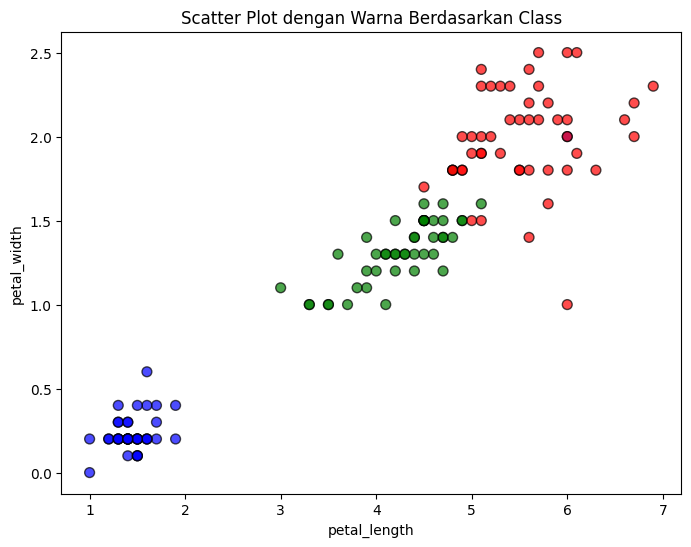

In [10]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "petal_length"
y_feature = "petal_width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}

# Pastikan tidak ada NaN dalam kolom "class"
df_cleaned = df_cleaned.dropna(subset=["class"])

# Peta warna berdasarkan kelas
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Pastikan tidak ada NaN dalam kolom "color"
df_cleaned = df_cleaned.dropna(subset=["color"])

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()


### membagi data menjadi data training (80%) dan testing (20%)

Kode ini digunakan untuk mengambil, membersihkan, dan membagi dataset Iris yang berasal dari dua database (PostgreSQL dan MySQL).

-Kode ini menggabungkan data dari dua database (PostgreSQL & MySQL) dan
 membersihkannya sebelum digunakan dalam analisis atau model machine learning.

-Local Outlier Factor (LOF) digunakan untuk mendeteksi dan menghapus data
 outlier, sehingga meningkatkan kualitas dataset.

-Setelah pembersihan, data dibagi menjadi training (80%) dan testing (20%),  
 yang siap digunakan untuk modeling atau analisis lebih lanjut.

-Pembersihan data ini sangat penting, karena menghapus outlier dapat       meningkatkan akurasi model machine learning yang akan dilatih.

In [11]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

# Fungsi untuk mengambil data dari PostgreSQL
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_sc56Zt79uy033vzjIS4",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()

    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Fungsi untuk mengambil data dari MySQL
def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-16cb25be-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_MfLHp-bDUZ-2mkcA1a6",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
X = df_merged[feature_columns].values  # Data fitur
y = df_merged["class"]  # Label klasifikasi

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Bagi data menjadi Training (80%) dan Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns], df_cleaned["class"], test_size=0.2, random_state=42
)

# Menampilkan jumlah data setelah pembagian
print(f"Jumlah data setelah pembersihan: {df_cleaned.shape[0]}")
print(f"Training set: {X_train.shape[0]} sampel")
print(f"Testing set: {X_test.shape[0]} sampel")

# Visualisasi data setelah pembersihan
# sns.pairplot(df_cleaned, hue="class")
# plt.show()


Jumlah data setelah pembersihan: 135
Training set: 108 sampel
Testing set: 27 sampel


### menghitung akurasi data bersih

Kode ini bertujuan untuk mengambil data dari PostgreSQL dan MySQL, membersihkan data dengan deteksi outlier, melatih model KNN, dan mengevaluasi akurasinya.

-Kode ini mengambil data dari PostgreSQL dan MySQL, menggabungkannya, dan
 membersihkannya dari outlier menggunakan LOF.

-Model KNN dilatih setelah data dibagi menjadi training dan testing.
 Pipeline digunakan untuk memastikan preprocessing data berjalan otomatis dengan scaling.

-Evaluasi menunjukkan seberapa baik model KNN dalam mengklasifikasikan dataset
 iris setelah pembersihan outlier.

In [12]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_sc56Zt79uy033vzjIS4",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-16cb25be-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_MfLHp-bDUZ-2mkcA1a6",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values
target_values = df_merged["class"].values

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(data_values)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Menampilkan jumlah data sebelum dan setelah pembersihan
print(f"Jumlah data sebelum pembersihan: {df_merged.shape[0]}")
print(f"Jumlah data setelah pembersihan: {df_cleaned.shape[0]}")

# Split data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns], df_cleaned["class"], test_size=0.2, random_state=42
)

# Pipeline dengan StandardScaler dan KNN
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

# Latih model
clf.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = clf.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Visualisasi data setelah pembersihan
# sns.pairplot(df_cleaned, hue="class")
# plt.show()

Jumlah data sebelum pembersihan: 150
Jumlah data setelah pembersihan: 135
Akurasi Model: 1.00

Laporan Klasifikasi:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        27
      macro avg       1.00      1.00      1.00        27
   weighted avg       1.00      1.00      1.00        27



### visualisasi decision boundary
Kode ini bertujuan untuk mengambil data dari PostgreSQL dan MySQL, membersihkan outlier, melatih model KNN, serta memvisualisasikan decision boundary.


-Data dari PostgreSQL dan MySQL berhasil diambil dan digabungkan.

-Data outlier terdeteksi dengan LOF dan dihapus agar model lebih akurat.

-KNN dengan pipeline dan scaling menghasilkan model yang lebih stabil.

-Akurasi model dihitung dan laporan klasifikasi menunjukkan performa tiap kelas.

-Decision boundary divisualisasikan untuk memahami bagaimana model membagi  
kelas iris.

Akurasi: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        27
      macro avg       1.00      1.00      1.00        27
   weighted avg       1.00      1.00      1.00        27



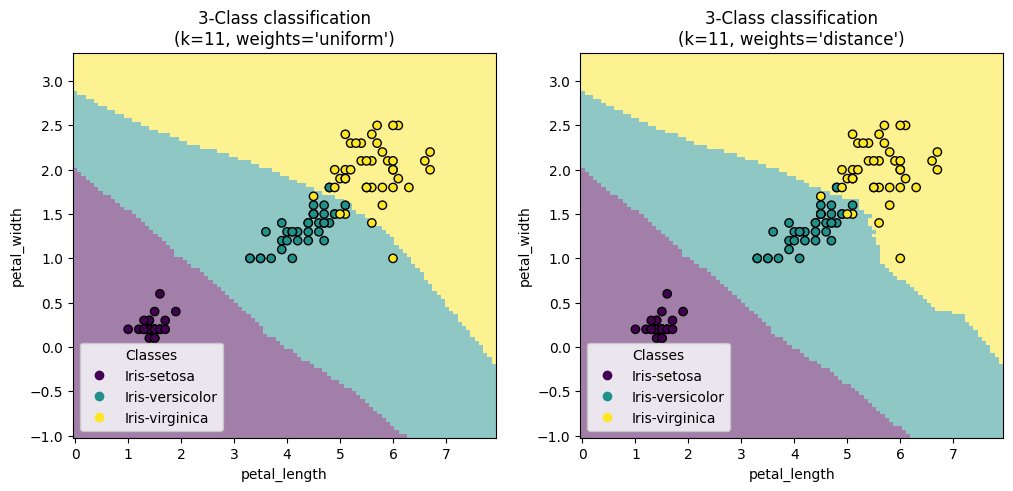

In [18]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Fungsi untuk mengambil data dari PostgreSQL
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_sc56Zt79uy033vzjIS4",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-16cb25be-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_MfLHp-bDUZ-2mkcA1a6",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["petal_length", "petal_width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengubah nama kelas menjadi angka

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),  # Pastikan target dalam bentuk numerik
    test_size=0.2,
    random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()
